In [1]:
import geopandas as gpd
import pandas as pd

In [108]:
parcel = gpd.read_file('census/pluto_st_area.geojson')

In [109]:
tract = gpd.read_file('census/cb_2018_36_tract_500k.shp', dtype={'TRACTCE': str})

In [110]:
parcel.to_crs(2263, inplace=True)
tract.to_crs(2263, inplace=True)

In [111]:
pop = pd.read_excel('census/t_pl_p5_ct.xlsx', dtype={'TRACTCE': str})

In [112]:
tract['tract_fp'] = tract['TRACTCE'] + '-' + tract['COUNTYFP']
tract.set_index('tract_fp', inplace=True)
tract.sort_index(inplace=True)
tract.head()

,STATEFP,COUNTYFP,TRACTCE,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
tract_fp,,,,,,,,,,
000100-001,36,001,000100,1400000US36001000100,36001000100,1,CT,2367456,245021,"POLYGON ((1052847.926 913198.540, 1053198.755 ..."
000100-005,36,005,000100,1400000US36005000100,36005000100,1,CT,1677210,1035011,"POLYGON ((1014011.324 231196.214, 1019618.264 ..."
000100-007,36,007,000100,1400000US36007000100,36007000100,1,CT,874859,0,"POLYGON ((454999.993 714307.133, 456301.315 71..."
000100-015,36,015,000100,1400000US36015000100,36015000100,1,CT,4167032,118779,"POLYGON ((218560.243 723592.908, 219844.152 72..."
000100-021,36,021,000100,1400000US36021000100,36021000100,1,CT,92797123,301438,"POLYGON ((1113814.219 836339.716, 1113779.435 ..."


In [113]:
pop['tract_fp'] = pop['TRACTCE'] + '-' + pop.FIPS.astype(str).map(lambda x: x.zfill(3))
pop.set_index('tract_fp', inplace=True)
pop.sort_index(inplace=True)
pop.head()

,index,FIPS,Boro_code,TRACTCE,Pop_2020,Pop_2010,delta_pop,per_ch,area
tract_fp,,,,,,,,,
000100-005,1,5,2,000100,12780,11091,-1689,-13.215962,390.27
000100-047,340,47,3,000100,5498,4338,-1160,-21.098581,55.21
000100-061,1101,61,1,000100,0,2,2,-,19.43
000100-081,1389,81,4,000100,1370,4949,3579,261.240876,282.59
000200-005,2,5,2,000200,3545,4334,789,22.2567,112.51


In [114]:
tract_pop = tract.join(pop[['Pop_2020', 'Pop_2010']]).dropna(subset=['Pop_2020', 'Pop_2010'])[['Pop_2010', 'Pop_2020', 'geometry']]
tract_pop

,Pop_2010,Pop_2020,geometry
tract_fp,,,
000100-005,11091.0,12780.0,"POLYGON ((1014011.324 231196.214, 1019618.264 ..."
000100-047,4338.0,5498.0,"POLYGON ((985165.569 194624.873, 985598.079 19..."
000100-061,2.0,0.0,"POLYGON ((971238.255 191080.500, 972920.326 19..."
000100-081,4949.0,1370.0,"POLYGON ((994608.689 208528.469, 994951.433 20..."
000200-005,4334.0,3545.0,"POLYGON ((1021558.247 236060.696, 1021824.736 ..."
...,...,...,...
157903-081,3944.0,3841.0,"POLYGON ((1063589.512 207614.650, 1065581.843 ..."
161700-081,4297.0,4359.0,"POLYGON ((1060647.778 203645.278, 1060936.889 ..."
162100-081,6197.0,6181.0,"POLYGON ((1057254.067 205474.717, 1057285.056 ..."


<AxesSubplot:>

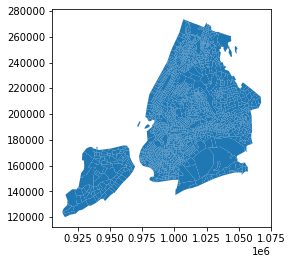

In [115]:
tract_pop.plot()

In [153]:
tract_pop[tract_pop.intersects(parcel.iloc[0].geometry.centroid)]

,Pop_2010,Pop_2020,geometry
tract_fp,,,
031703-061,7709.0,1574.0,"POLYGON ((977780.582 200049.754, 978022.615 20..."


In [ ]:
parcel.iloc[0:1].geometry.centroid

In [152]:
def lookup_tract(p):
    # cetroid so that a parcel can only be in one tract
    tract = tract_pop[tract_pop.intersects(p.geometry.centroid)]
    return tracts.index.values

test = parcel.apply(lookup_tracts, axis=1)

KeyboardInterrupt: 